## Business Understanding

Nama : Fernando Michael Hebert Siregar <br>
NPM : 50421515 <br>
Kelas : 4IA20 <br>

<br>
Dalam dunia digital yang semakin terhubung, email telah menjadi salah satu alat komunikasi utama. Namun, maraknya aktivitas spam telah menjadi masalah serius yang mengganggu produktivitas dan keamanan pengguna. Kemampuan untuk secara akurat mengklasifikasikan email sebagai spam atau bukan adalah kunci dalam menjaga kualitas komunikasi melalui email. Proyek ini bertujuan untuk mengembangkan sebuah model prediksi yang dapat mengidentifikasi email spam. Dengan adanya model ini, penyedia layanan email dapat secara efektif memfilter email spam, sehingga pengguna dapat lebih fokus pada pesan yang relevan dan penting. Model ini diharapkan dapat meningkatkan pengalaman pengguna, mengurangi risiko penipuan, dan menjaga keamanan data pribadi pengguna.

## Data Understanding

In [1]:
# Mengimport Library

# Library dalam preprocessing teks
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk persiapan data sebelum modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Library model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Library Evaluasi Model
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Melakukan load pada data
df = pd.read_csv('data/combined_data.csv')

In [3]:
# Menampilkan 5 data teratas
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
# Menampilkan 5 data terbawah
df.tail()

,label,text
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...
83447,1,get the most out of life ! viagra has helped m...


In [5]:
# Menampilkan 5 data secara acak
df.sample(5)

,label,text
26010,0,hi you can use tail tail data escapenumber giv...
57871,0,author jerry date escapenumber escapenumber es...
82029,1,megasize your unit with megadlk a huge advance...
40720,0,the daily top escapenumber from cnn com top v...
33270,1,at last the true stuff escapenumber no more ra...


<Axes: xlabel='label', ylabel='count'>

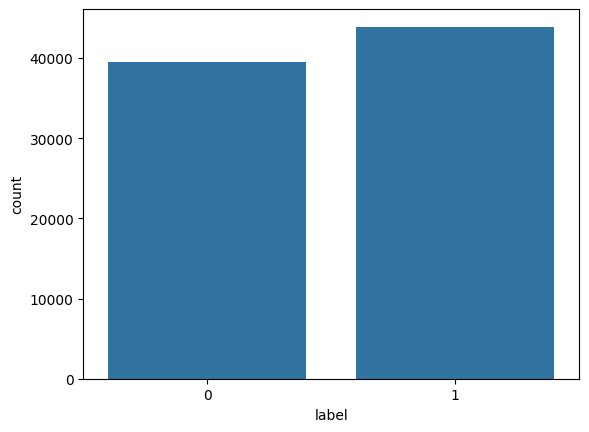

In [6]:
#Visualisasi jumlah email spam(1) dan tidak(0)
sns.countplot(data=df, x='label')

## Data Preparation

In [7]:
# Mengecek nilai kosong atau null
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
# Membuat semua kalimat menjadi lower case / kalimat kecil
df['text'] = df['text'].str.lower()

In [9]:
# Membuat sebuah fungsi untuk membersihkan setiap teks dalam data
def cleaning_text(text):
    # Punctuation berisi semua tanda baca yang ada pada library string
    punc = list(punctuation)

    # Stop words merupakan beberapa kata yang biasanya tidak memberikan banyak makna
    stop = stopwords.words('english')

    # Menggabungkan list punctuation (tanda baca) dan stopwords
    prob = punc + stop

    # WordNetLemmatizer merupakan library yang digunakan untuk stemming, atau menghapus imbuhan pada data
    lemma = WordNetLemmatizer()

    # Melakukan tokenize pada data teks
    tokens = word_tokenize(text)

    # Semua token yang mengandung karakter non-alfabet (misalnya angka, simbol) dihapus
    word_tokens = [t for t in tokens if t.isalpha()]

    # Menjalankan pembersihan kalimat
    clean = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in prob]
    return ' '.join(clean)

In [10]:
# Membersihkan data dengan mengakses fungsi diatas
df['clean_text'] = df['text'].apply(cleaning_text)
df.head()

,label,text,clean_text
0,1,ounce feather bowl hummingbird opec moment ala...,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,thanks answer guy know checked rsync manual wo...


In [11]:
# Mengambil beberapa sampel data
spam = df[df['label'] == 1].sample(7000)
ham = df[df['label'] == 0].sample(7000)

df = pd.concat([spam,ham],axis=0)
df.shape

(14000, 3)

In [12]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df['clean_text']
y = df['label']

In [13]:
# Mengubah teks yang ada menjadi list numerik
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()

In [14]:
# Melakukan pembagian data sebesar 70% pada data train dan 30% pada data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

### Logistic Regression

In [15]:
# Memanggil objek Logistic Regression ke dalam variabel
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Akurasi Logistic Regression :  0.9719047619047619
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2084
           1       0.96      0.99      0.97      2116

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



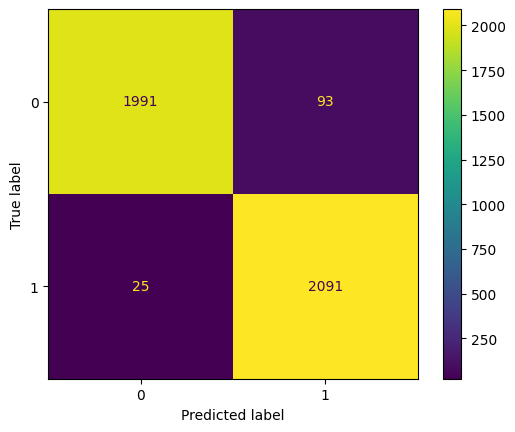

In [16]:
# Mengevaluasi kinerja hasil latih model Logistic Regression
y_pred_log = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)
print("Akurasi Logistic Regression : ", accuracy_score(y_test, y_pred_log))
display_cm = ConfusionMatrixDisplay(cm)
print(classification_report(y_test, y_pred_log))
display_cm.plot()

### Random Forest

In [17]:
# Memanggil objek Random Forest ke dalam variabel
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Akurasi Random Forest :  0.969047619047619
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2084
           1       0.97      0.97      0.97      2116

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



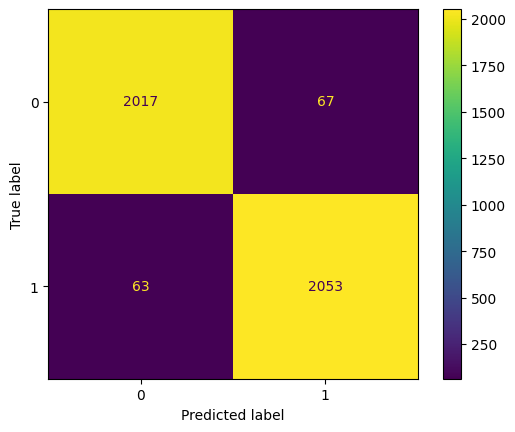

In [18]:
# Mengevaluasi kinerja hasil latih model Random Forest
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
display_cm = ConfusionMatrixDisplay(cm)
print("Akurasi Random Forest : ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
display_cm.plot()

### Naive Bayes

In [19]:
# Memanggil objek Naive Bayes ke dalam variabel
naive = MultinomialNB()
naive.fit(X_train, y_train)

MultinomialNB()

Akurasi Random Forest :  0.964047619047619
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2084
           1       0.98      0.95      0.96      2116

    accuracy                           0.96      4200
   macro avg       0.96      0.96      0.96      4200
weighted avg       0.96      0.96      0.96      4200



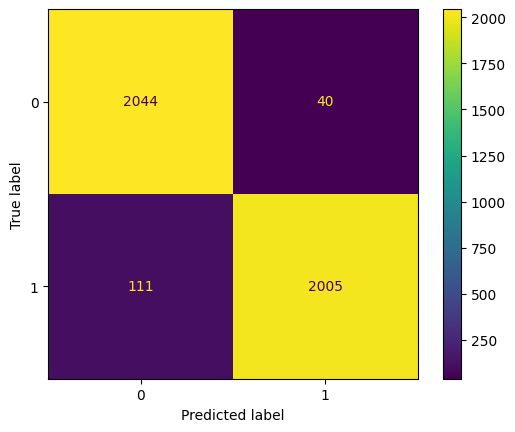

In [20]:
# Mengevaluasi kinerja hasil latih model Naive Bayes
y_pred_naive = naive.predict(X_test)
cm = confusion_matrix(y_test, y_pred_naive)
display_cm = ConfusionMatrixDisplay(cm)
print("Akurasi Random Forest : ", accuracy_score(y_test, y_pred_naive))
print(classification_report(y_test, y_pred_naive))
display_cm.plot()

## Evaluasi model

In [21]:
print(f"Akurasi Pada Logistic Regression : {round(accuracy_score(y_test, y_pred_log) * 100, 2)}%")
print(f"Akurasi Pada Logistic Random Forest : {round(accuracy_score(y_test, y_pred_rf) * 100, 2)}%")
print(f"Akurasi Pada Naive Bayes : {round(accuracy_score(y_test, y_pred_naive) * 100, 2)}%")

Akurasi Pada Logistic Regression : 97.19%
Akurasi Pada Logistic Random Forest : 96.9%
Akurasi Pada Naive Bayes : 96.4%


Dari perbandingan model diatas dapat dilihat bahwa model Logistic Regression memiliki akurasi tertinggi sehingga dalam tahap deployment model Logistic Regression akan dipilih.

## Deployment

In [22]:
import joblib

joblib.dump(log_reg, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']